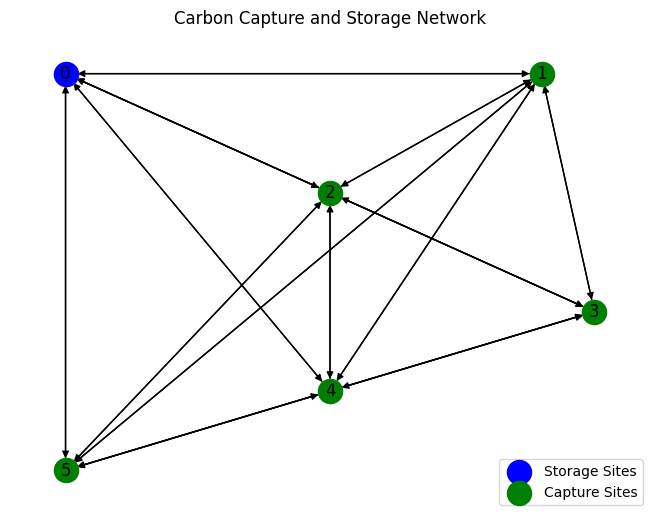

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def parse_instance_file(file_path):
    """Parses the instance_small.txt file to extract graph components."""
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Extract time horizon
    T = int(lines[1].split('=')[1].strip())

    # Extract number of nodes and storage sites
    N = int(lines[3].split('=')[1].strip())
    n_storage = int(lines[6].split('=')[1].strip())

    # Extract storage site details
    storage_sites = {}
    storage_start = 12
    for i in range(n_storage):
        parts = list(map(float, lines[storage_start + i].split(',')))
        storage_sites[int(parts[0])] = (parts[1], parts[2])

    # Extract capture site details
    n_capture = int(lines[storage_start + n_storage + 2].split('=')[1].strip())
    capture_sites = {}
    capture_start = storage_start + n_storage + 9
    for i in range(n_capture):
        parts = list(map(float, lines[capture_start + i].split(',')))
        capture_sites[int(parts[0])] = (parts[1], parts[2], parts[3])

    # Extract rail connections
    rail_start = capture_start + n_capture + 16
    rail_matrix = []
    for i in range(N):
        rail_matrix.append(list(map(int, lines[rail_start + i].split(','))))

    return T, storage_sites, capture_sites, rail_matrix

def build_graph(storage_sites, capture_sites, rail_matrix):
    """Builds the graph using storage sites, capture sites, rail, truck, and pipeline connections."""
    G = nx.DiGraph()

    # Add storage sites to the graph
    for id, site in storage_sites.items():
        G.add_node(int(id), pos=(site[0], site[1]), type='storage')

    # Add capture sites to the graph
    for id, site in capture_sites.items():
        G.add_node(int(id), pos=(site[0], site[1]), type='capture', emissions=site[2])

    # Add rail connections as edges
    for i, row in enumerate(rail_matrix):
        for j, connection in enumerate(row):
            if connection == 1:
                G.add_edge(i, j, type='rail')

    # Add truck and pipeline connections as edges between all pairs of nodes
    nodes = list(G.nodes())
    for i in nodes:
        for j in nodes:
            if i != j:
                G.add_edge(i, j, type='truck')
                G.add_edge(i, j, type='pipeline')

    return G

def plot_graph(G, connection_types):
    """Plots the graph using Matplotlib, showing only specified connection types."""
    pos = nx.get_node_attributes(G, 'pos')
    node_types = nx.get_node_attributes(G, 'type')
    edge_types = nx.get_edge_attributes(G, 'type')

    storage_nodes = [n for n in G.nodes if node_types[n] == 'storage']
    capture_nodes = [n for n in G.nodes if node_types[n] == 'capture']

    edges_to_plot = [(u, v) for u, v in G.edges if edge_types[(u, v)] in connection_types]

    nx.draw(G, pos, with_labels=True, node_color='lightgray', edge_color='black')
    nx.draw_networkx_nodes(G, pos, nodelist=storage_nodes, node_color='blue', label='Storage Sites')
    nx.draw_networkx_nodes(G, pos, nodelist=capture_nodes, node_color='green', label='Capture Sites')
    nx.draw_networkx_edges(G, pos, edgelist=edges_to_plot, edge_color='red', label='Selected Connections')

    plt.legend()
    plt.title("Carbon Capture and Storage Network")
    plt.show()

# Main execution
file_path = 'data/instance_small.txt'
T, storage_sites, capture_sites, rail_matrix = parse_instance_file(file_path)
G = build_graph(storage_sites, capture_sites, rail_matrix)
plot_graph(G, connection_types=['rail', 'truck'])


In [5]:
# Extract the sets
N_c = list(capture_sites.keys())  # Emission and capture site IDs
N_s = list(storage_sites.keys())  # Storage site IDs
N_t = [node for node in G.nodes if G.nodes[node]['type'] not in ['capture', 'storage']]  # Transport nodes
T = T  # Time horizon

# Print the sets
print("Time Horizon (T):", T)
print("Capture Sites (N_c):", N_c)
print("Storage Sites (N_s):", N_s)
print("Transport Nodes (N_t):", N_t)


Time Horizon (T): 25
Capture Sites (N_c): [1, 2, 3, 4, 5]
Storage Sites (N_s): [0]
Transport Nodes (N_t): []
